# Data analyse voor technisch rapport

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load data

You can put your data at the same directory as the notebook file and then use `pandas` to load the data.

### Fietsendiefstallen tegenover maximale temperatuur

_Lichte toename in diefstallen bij warmer weer._

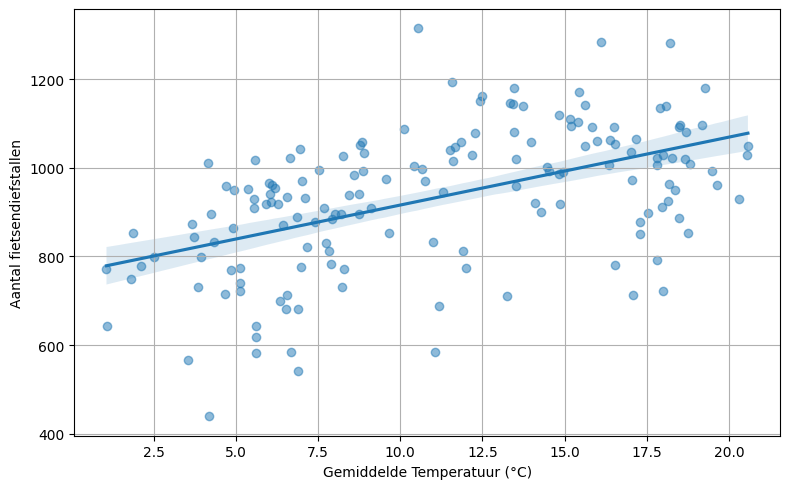

In [2]:
df = pd.read_csv("merged_weather_misdrijven_monthly_v3.csv")
df

df.columns = df.columns.str.strip()
df['TX'] = df['TX'] / 10  # TX is in tienden van °C
df['TG'] = df['TG'] / 10  # TG is in tienden van °C
display(Markdown("### Fietsendiefstallen tegenover maximale temperatuur"))
display(Markdown("_Lichte toename in diefstallen bij warmer weer._"))

# 📈 Plot maken
plt.figure(figsize=(8, 5))
sns.regplot(
    x='TG',
    y='1.2.3 Diefstal van brom-, snor-, fietsen',
    data=df,
    scatter_kws={'alpha': 0.5}
)
plt.xlabel("Gemiddelde Temperatuur (°C)")
plt.ylabel("Aantal fietsendiefstallen")
plt.grid(True)
plt.tight_layout()
plt.savefig('fietsdiefstal_temperatuur.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
weer_vars = ["TG", "SQ", "VVN"]
misdaad_vars = ["1.1.1 Diefstal/inbraak woning", 
                "1.2.3 Diefstal van brom-, snor-, fietsen",
                "1.4.2 Moord, doodslag", 
                "1.4.5 Mishandeling"]

# Zorg dat alles numeriek is
for col in misdaad_vars:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Bereken alle combinaties van weer x misdaad
correlaties = pd.DataFrame(index=weer_vars, columns=misdaad_vars)

for w in weer_vars:
    for m in misdaad_vars:
        correlaties.loc[w, m] = df[w].corr(df[m])
print(correlaties)


    1.1.1 Diefstal/inbraak woning 1.2.3 Diefstal van brom-, snor-, fietsen  \
TG                       -0.22508                                 0.513662   
SQ                      -0.283477                                  0.29488   
VVN                     -0.318284                                  0.30128   

    1.4.2 Moord, doodslag 1.4.5 Mishandeling  
TG               0.262466           0.388924  
SQ               0.201248            0.36095  
VVN              0.120308           0.250788  


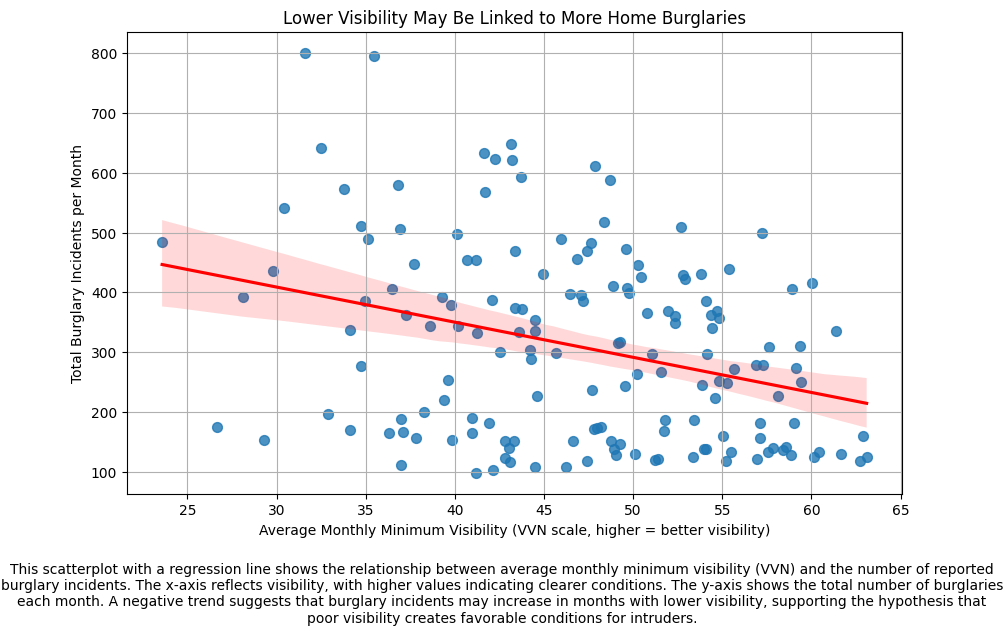

In [4]:
plt.figure(figsize=(10,6))

sns.regplot(data=df, x='VVN', y='1.1.1 Diefstal/inbraak woning', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('Lower Visibility May Be Linked to More Home Burglaries')

plt.xlabel('Average Monthly Minimum Visibility (VVN scale, higher = better visibility)')
plt.ylabel('Total Burglary Incidents per Month')

plt.grid(True)

caption = (
    "This scatterplot with a regression line shows the relationship between average monthly minimum visibility "
    "(VVN) and the number of reported burglary incidents. The x-axis reflects visibility, with higher values indicating clearer conditions. "
    "The y-axis shows the total number of burglaries each month. A negative trend suggests that burglary incidents may increase "
    "in months with lower visibility, supporting the hypothesis that poor visibility creates favorable conditions for intruders."
)

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


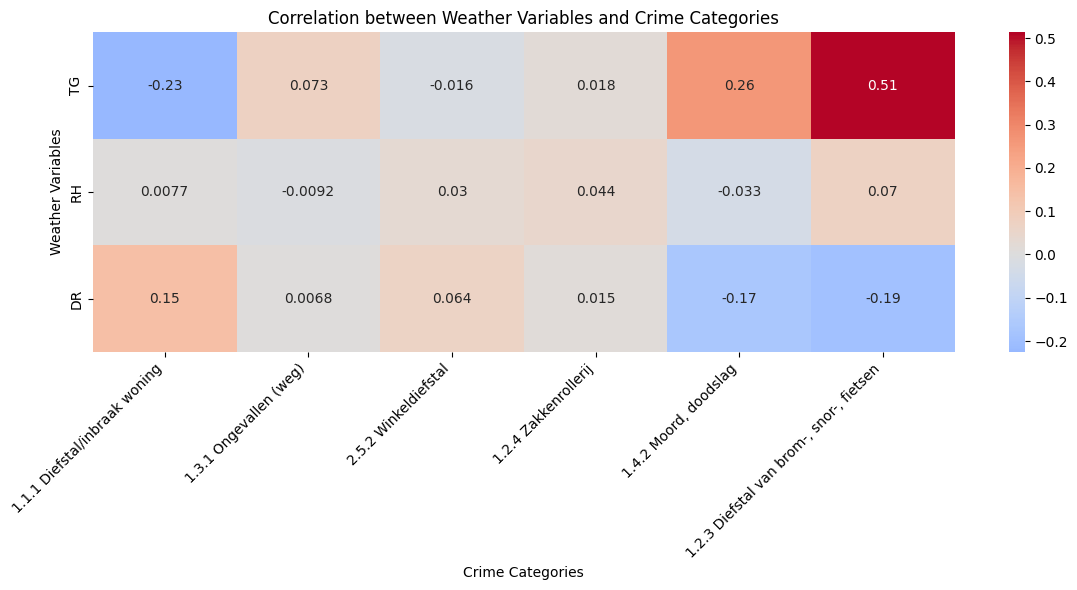

In [5]:
weer_vars = ['TG', 'RH', 'DR']
misdaad_vars = [
    '1.1.1 Diefstal/inbraak woning',
    '1.3.1 Ongevallen (weg)',
    '2.5.2 Winkeldiefstal',
    '1.2.4 Zakkenrollerij',
    '1.4.2 Moord, doodslag',
    '1.2.3 Diefstal van brom-, snor-, fietsen'
]

# Maak subset dataframe met weer en misdaad kolommen
df_subset = df[weer_vars + misdaad_vars]

# Bereken correlatie matrix
corr_matrix = df_subset.corr()

# Selecteer alleen correlaties tussen weer_vars (rijen) en misdaad_vars (kolommen)
corr_submatrix = corr_matrix.loc[weer_vars, misdaad_vars]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(corr_submatrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Variables and Crime Categories')
plt.xlabel('Crime Categories')
plt.ylabel('Weather Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


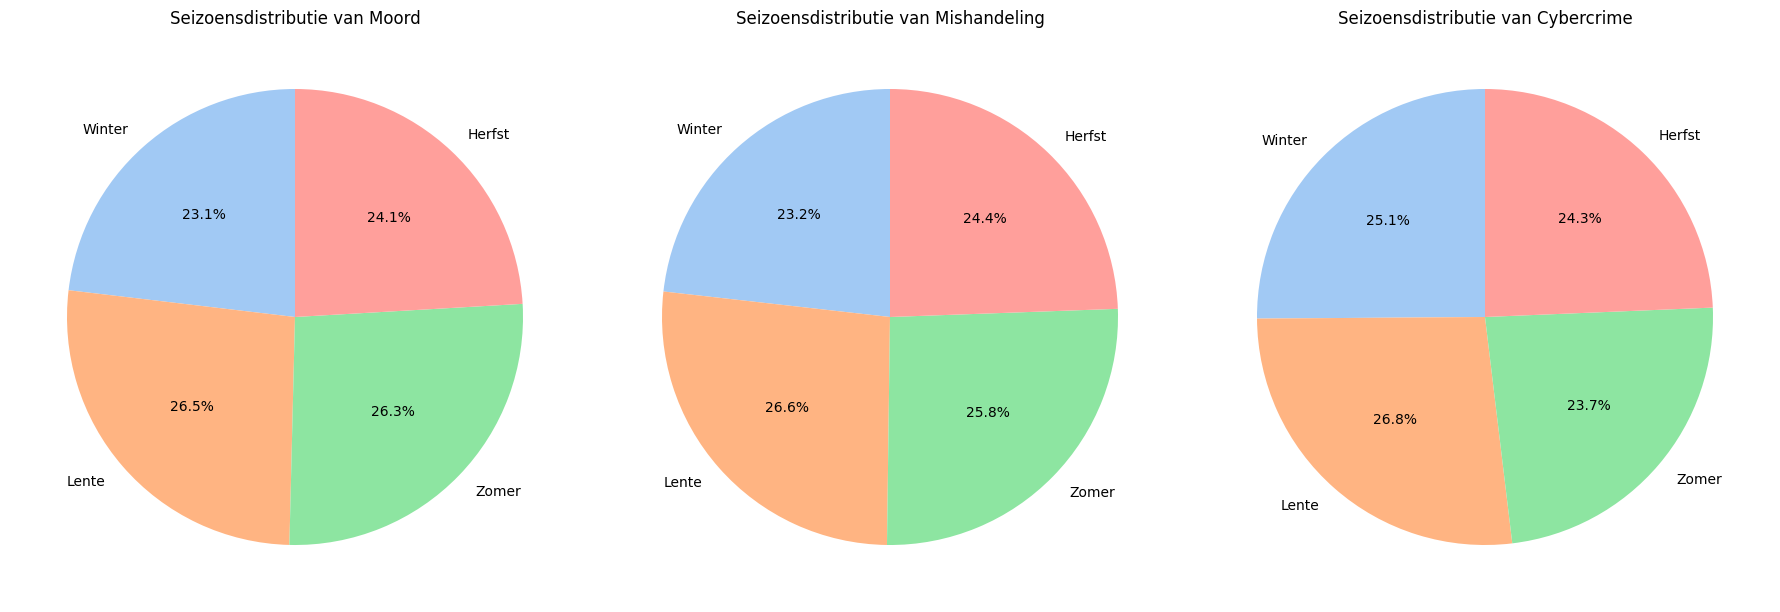

In [6]:
# Map each month number to a season
season_map = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Lente', 4: 'Lente', 5: 'Lente',
    6: 'Zomer', 7: 'Zomer', 8: 'Zomer',
    9: 'Herfst', 10: 'Herfst', 11: 'Herfst'
}

# Extract numeric month from 'year_month' and map to season
df['month'] = pd.to_datetime(df['year_month']).dt.month
df['Season'] = df['month'].map(season_map)

# Serious crime columns and their display names
serious_crimes = {
    '1.4.2 Moord, doodslag': 'Moord',
    '1.4.5 Mishandeling': 'Mishandeling',
    '3.7.4 Cybercrime': 'Cybercrime'
}

# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (col, label) in zip(axes, serious_crimes.items()):
    # Total incidents per season for each crime
    season_totals = df.groupby('Season')[col].sum().reindex(['Winter', 'Lente', 'Zomer', 'Herfst'])

    # Pie chart
    ax.pie(
        season_totals,
        labels=season_totals.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel")[0:4]
    )
    ax.set_title(f'Seizoensdistributie van {label}')
plt.tight_layout()
plt.savefig('seizoen_misdaad.png', dpi=300, bbox_inches='tight')
plt.show()

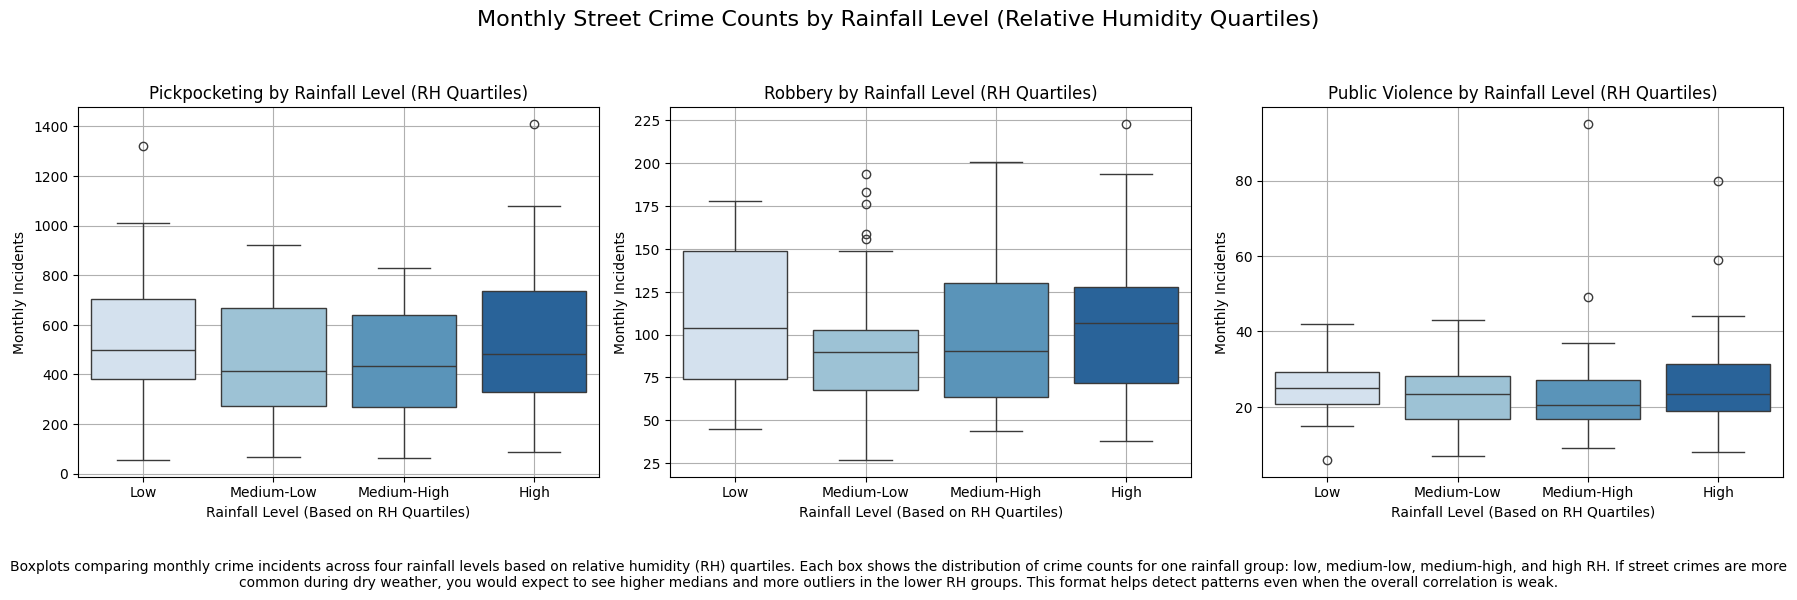

In [7]:
# Create RH quartiles (low to high rainfall)
df['Rainfall_Level'] = pd.qcut(df['RH'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Set up figure
crime_columns = {
    '1.2.4 Zakkenrollerij': 'Pickpocketing',
    '1.4.6 Straatroof': 'Robbery',
    '1.4.3 Openlijk geweld (persoon)': 'Public Violence'
}

plt.figure(figsize=(18, 5))

for i, (col, label) in enumerate(crime_columns.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Rainfall_Level', y=col, hue='Rainfall_Level', palette='Blues', legend=False)
    plt.title(f'{label} by Rainfall Level (RH Quartiles)')
    plt.xlabel('Rainfall Level (Based on RH Quartiles)')
    plt.ylabel('Monthly Incidents')
    plt.grid(True)

plt.suptitle('Monthly Street Crime Counts by Rainfall Level (Relative Humidity Quartiles)', fontsize=16, y=1.05)

caption = (
    "Boxplots comparing monthly crime incidents across four rainfall levels based on relative humidity (RH) quartiles. "
    "Each box shows the distribution of crime counts for one rainfall group: low, medium-low, medium-high, and high RH. "
    "If street crimes are more common during dry weather, you would expect to see higher medians and more outliers in the lower RH groups. "
    "This format helps detect patterns even when the overall correlation is weak."
)

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import FloatSlider, VBox, interactive_output

crime_columns = {
    'Pickpocketing': '1.2.4 Zakkenrollerij',
    'Robbery': '1.4.6 Straatroof',
    'Public violence': '1.4.3 Openlijk geweld (persoon)',
    'Under influence on boat': '3.4.2 Onder invloed (water)'
}

def plot_multiple_crimes(temp):
    lower = temp - 0.5
    upper = temp + 0.5

    filtered = df[(df['TX'] >= lower) & (df['TX'] < upper)]

    percentages = []
    for label, col in crime_columns.items():
        total = df[col].sum()
        count_at_temp = filtered[col].sum()
        percentage = (count_at_temp / total) * 100 if total > 0 else 0
        percentages.append((label, percentage))

    fig = go.Figure()

    for label, percentage in percentages:
        fig.add_trace(go.Bar(
            x=[label],
            y=[percentage],
            name=label,
            text=f"{percentage:.2f}%",
            textposition='auto'
        ))

    fig.update_layout(
        height=550,
        margin=dict(t=140, b=60),
        yaxis_title="Percentage of Total Incidents",
        xaxis_title="Crime Type",
        yaxis_range=[0, 15],

        # Title + subtitle via annotations
        annotations=[
            dict(
                text="Crime Distribution by Temperature Range",
                xref='paper', yref='paper',
                x=0.5, y=1.15,
                showarrow=False,
                font=dict(size=22, color='black'),
                xanchor='center', yanchor='bottom'
            ),
            dict(
                text="Crime patterns vary with temperature, but no clear linear trend emerges for most crimes, exceptions exist: under influence on boat for example.",
                xref='paper', yref='paper',
                x=0.5, y=1.08,
                showarrow=False,
                font=dict(size=14, color='gray'),
                xanchor='center', yanchor='bottom'
            )
        ]
    )
    fig.show(renderer="notebook_connected")

temperature_slider = FloatSlider(value=20, min=5, max=26.5, step=0.5, description='Temp (°C)')

out = interactive_output(plot_multiple_crimes, {'temp': temperature_slider})

VBox([out, temperature_slider])
